#### Reconstruccion de señales y muestreo

Todas las señales digitales tienen un muestreo determinado. A pesar de eso, una señal con un intervalo de muestreo suficientemente alto es una buena aproximacion a una señal continua. Generemos una señal continua simulada sumando varias sinosuidales.

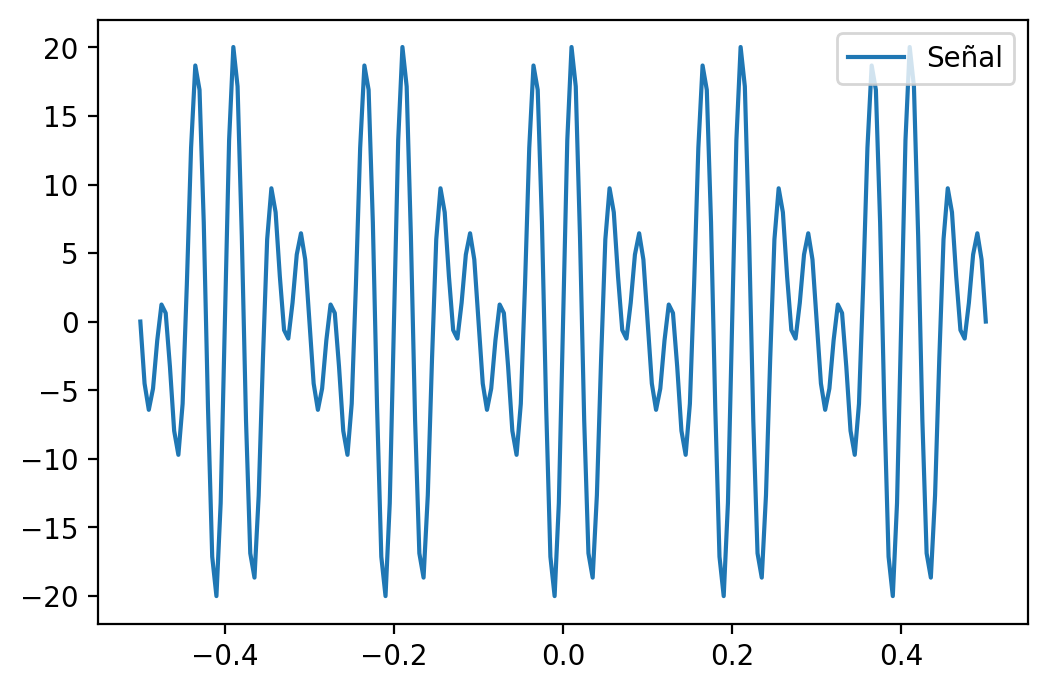

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
import scipy.fft as ft
xmin=-0.5
xmax=0.5
samples=201
dx=(xmax-xmin)/samples

x=np.linspace(xmin,xmax,samples)
y=10*np.sin(2*np.pi*x*25)+4*np.sin(2*np.pi*x*15)+9*np.sin(2*np.pi*x*20)-3*np.sin(2*np.pi*10*x)
plt.figure(dpi=200)
plt.plot(x,y,linestyle='-',label='Señal')
plt.legend(loc='best')

Ahora veamos el espectro de la señal. Para esto, definimos el espacio de frecuencias como un arreglo que va desde 
 -(1/2dx) a (1/2dx) con el mismo numero de muestras de la señal. dx sera igual a el dominio de la señal dividido el numero de muestras.

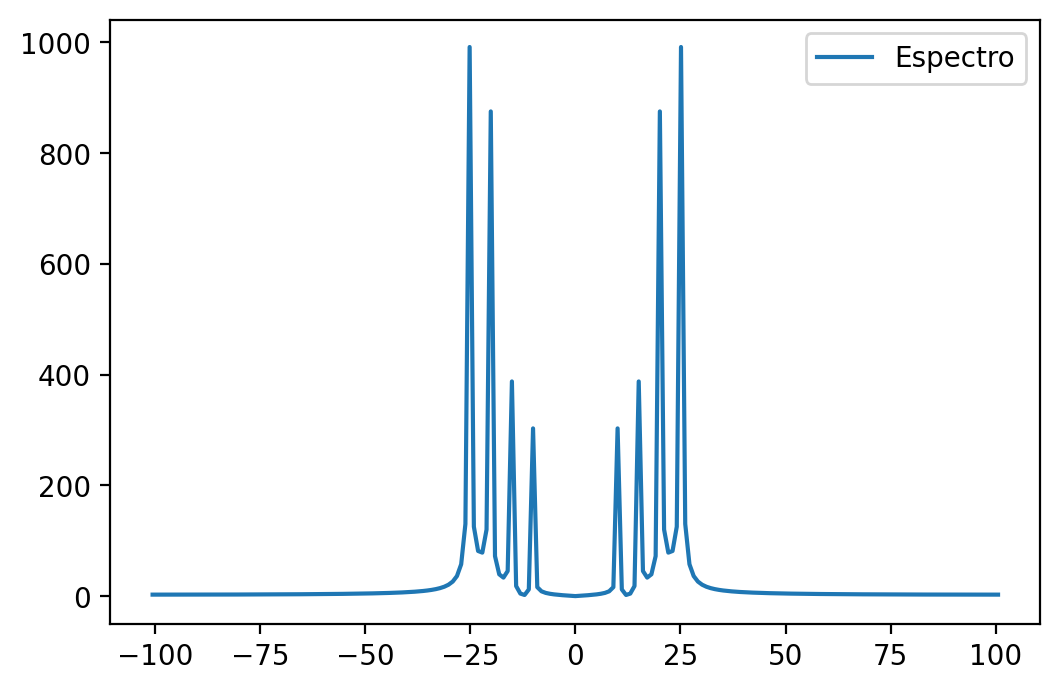

In [ ]:
fx=np.linspace(-1/(2*dx),1/(2*dx),samples)
fy=ft.fftshift(ft.fft(ft.ifftshift(y)))
Py=np.abs(fy)
plt.figure(dpi=200)
plt.plot(fx,Py,linestyle='-',label='Espectro')
plt.legend(loc='best')

Podemos definir una funcion comb como aqueña que tendra valor 1 en pixeles separados una distancia y cero en los demas, asi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

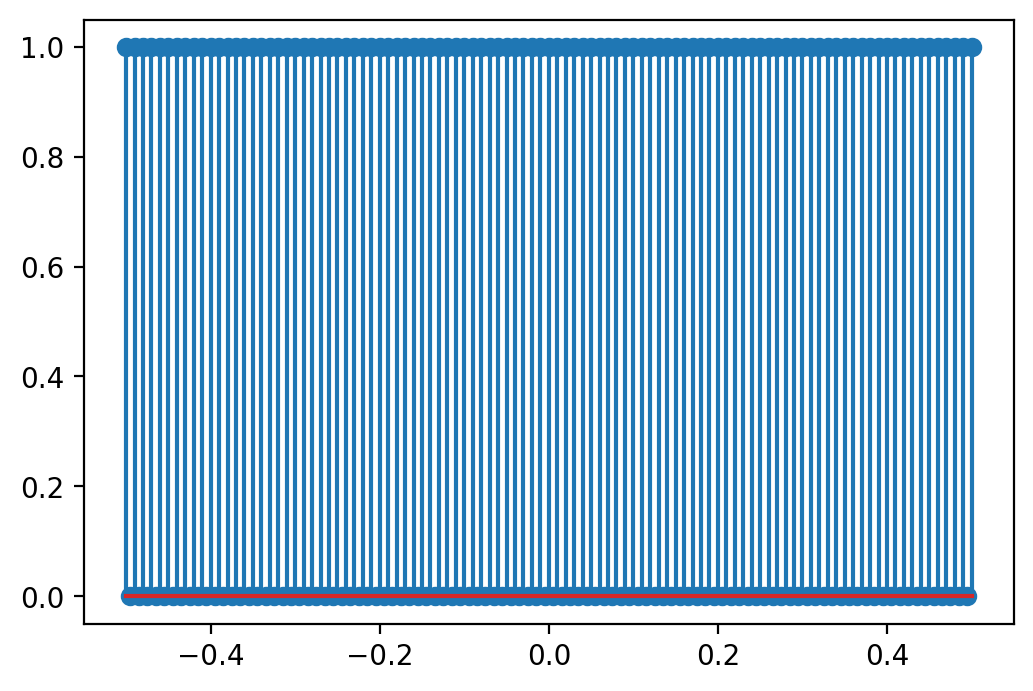

In [ ]:
def comb1d(x,s):
    q=len(x)
    R=np.zeros(np.shape(x))
    for i in range(q):
        if np.mod(i,s+1)==0:
            R[i]=1
    return R

R=comb1d(x,1)   
plt.figure(dpi=200)
plt.stem(x, R)

Multiplicamos la señal por la funcion peine para obtene la señal muestreada.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


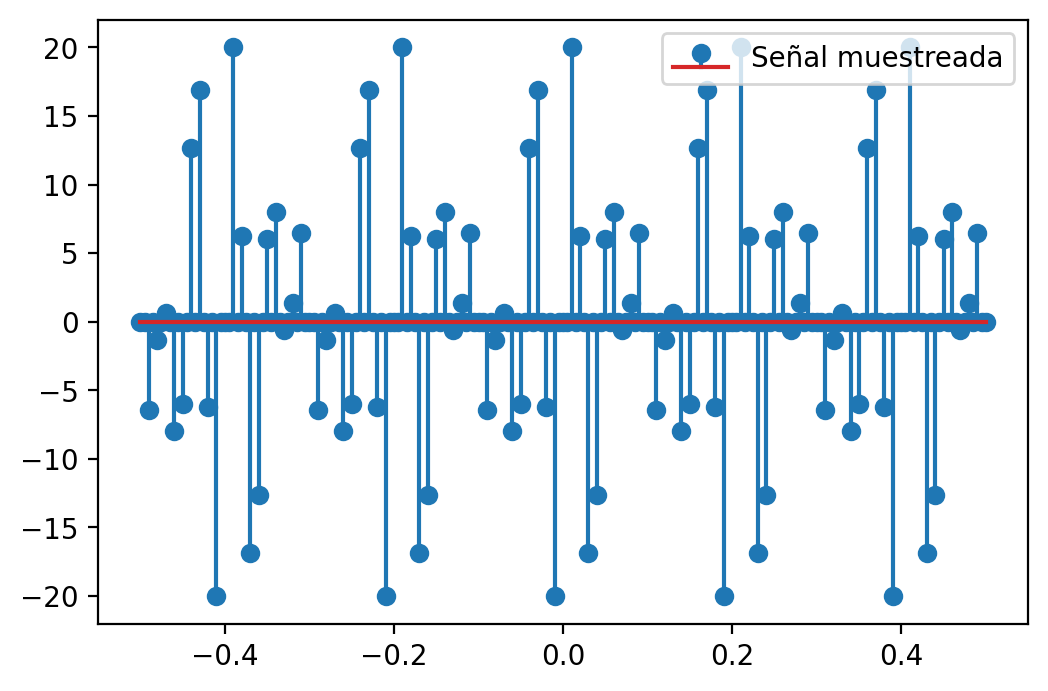

In [ ]:
S=y*R
plt.figure(dpi=200)
plt.stem(x,S,label='Señal muestreada')
plt.legend(loc='best')

Veamos el espectro de la señal muestreada y la original

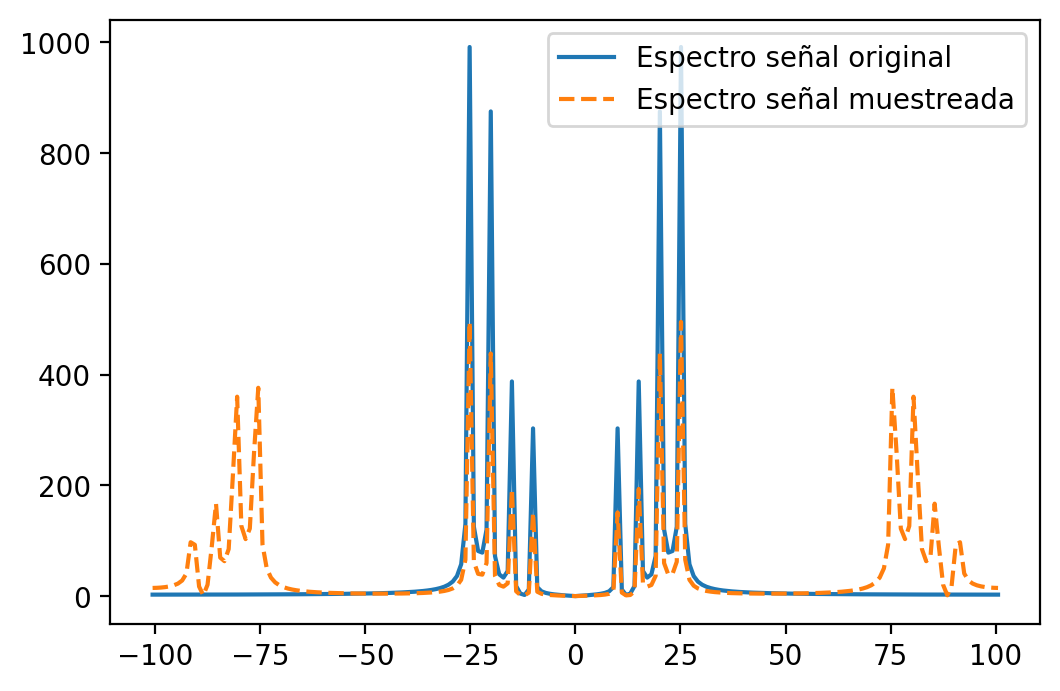

In [ ]:
fx=np.linspace(-1/(2*dx),1/(2*dx),samples)
sy=ft.fftshift(ft.fft(ft.ifftshift(S)))
Ps=np.abs(sy)
plt.figure(dpi=200)
plt.plot(fx,Py,linestyle='-',label='Espectro señal original')
plt.plot(fx,Ps,linestyle='--',label='Espectro señal muestreada')
plt.legend(loc='upper right')

Vemos que la maxima frecuencia es 25, luego podemos filtar el espectro muestreado con una funcion rect de ancho 51.

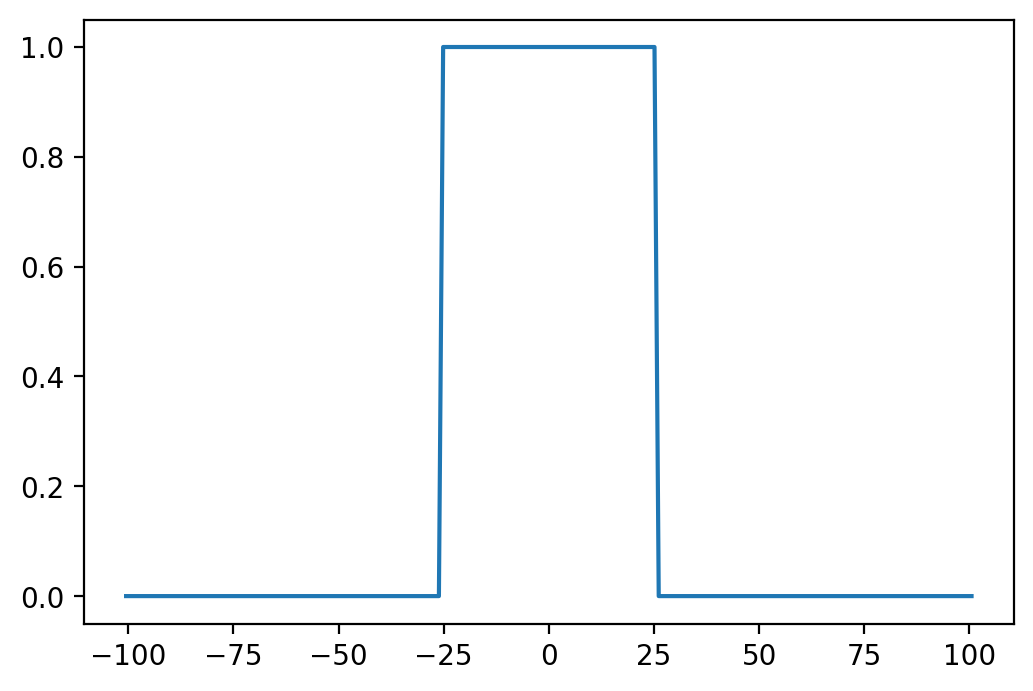

In [ ]:
def rect1d(x,anch,pos):
    n=len(x)
    R1=np.zeros(n)
    R2=np.zeros(n)
    R1[x>pos-anch/2]=1
    R2[x<pos+anch/2]=1
    R=R1*R2
    return R
F=rect1d(fx,51,0)
plt.figure(dpi=200)
plt.plot(fx,F,linestyle='-',label='filtro espectral')

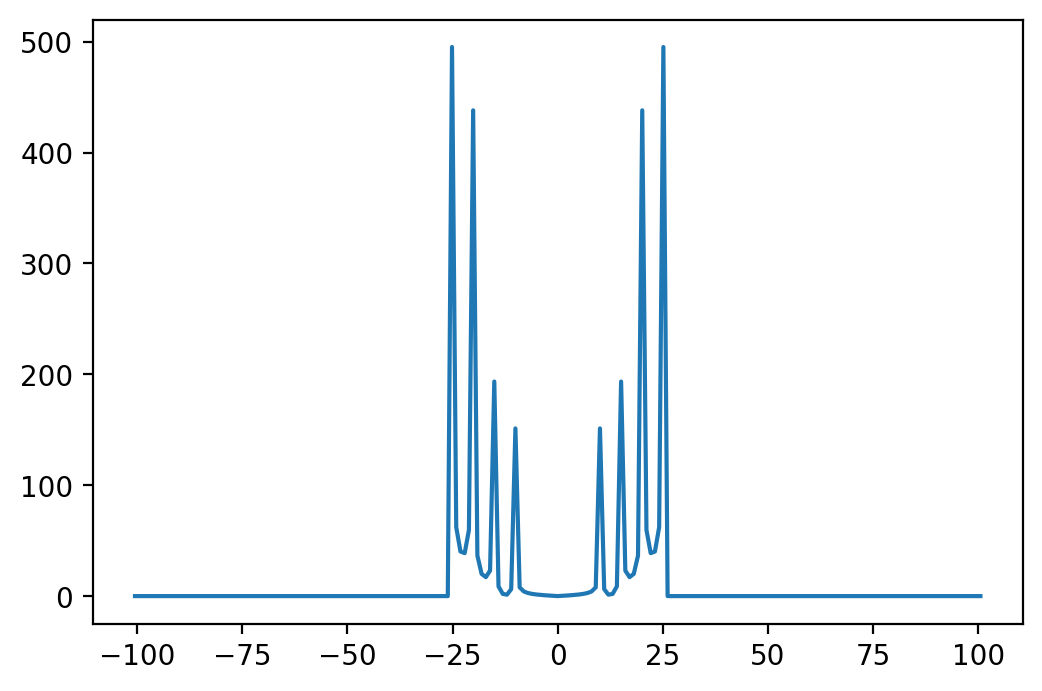

In [ ]:
E=sy*F
Pe=np.abs(E)
plt.figure(dpi=200)
plt.plot(fx,Pe,linestyle='-',label='Espectro señal muestreada')

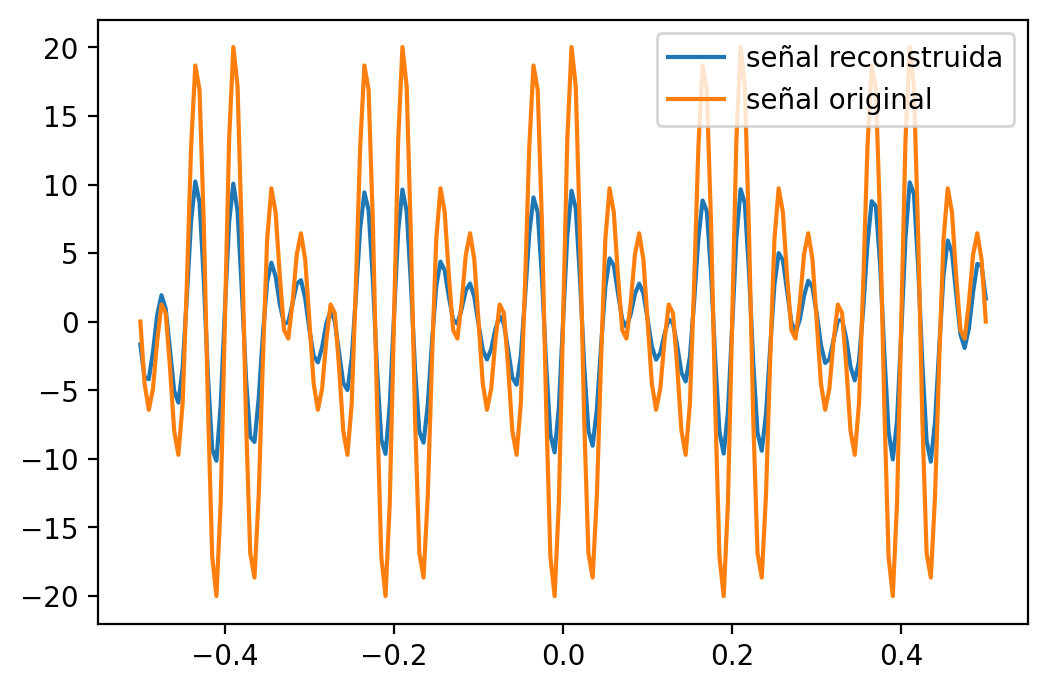

In [ ]:
yr=ft.fftshift(ft.ifft(ft.ifftshift(E)))
yre=np.real(yr)
plt.figure(dpi=200)
plt.plot(x,yre,linestyle='-',label='señal reconstruida')
plt.plot(x,y,linestyle='-',label='señal original')
plt.legend(loc='upper right')

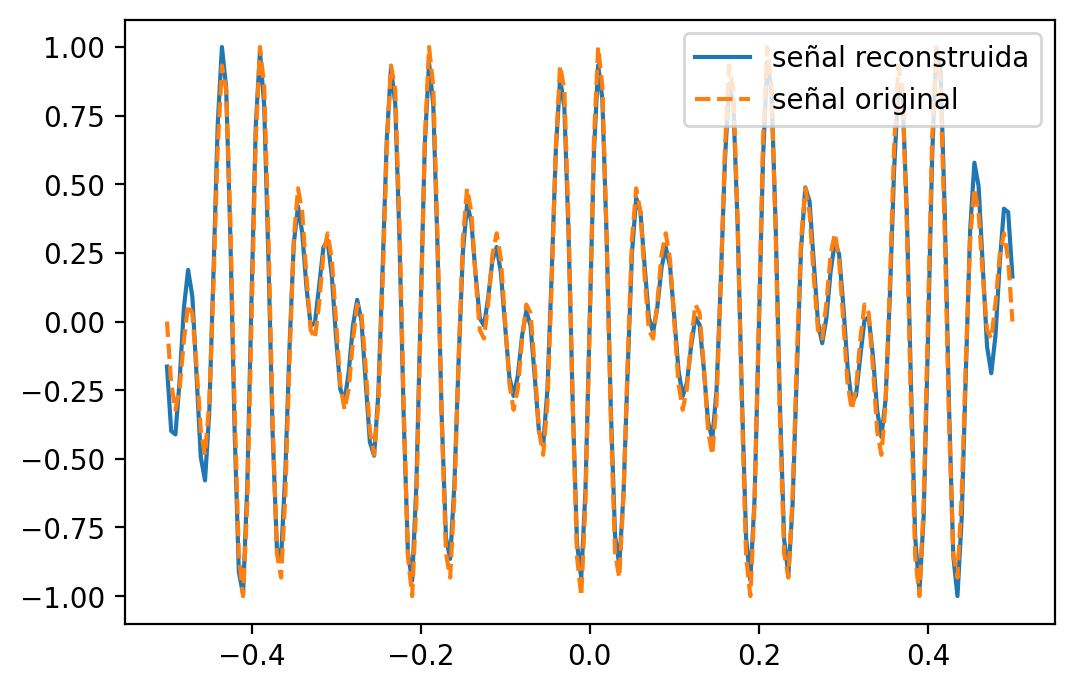

In [ ]:
nyre=yre/np.max(np.max(yre))
ny=y/np.max(np.max(y))
plt.figure(dpi=200)
plt.plot(x,nyre,linestyle='-',label='señal reconstruida')
plt.plot(x,ny,linestyle='--',label='señal original')
plt.legend(loc='upper right')

In [ ]:
r = np.corrcoef(nyre, ny)
print(r[0,1])

0.994006666197095


Ahora probemos en una señal 2D, como una imagen.

In [ ]:
from PIL import Image as im
a=im.open('pout.bmp')
a=np.asarray(a)
plt.figure(dpi=200)
plt.imshow(a,cmap=plt.get_cmap('gray'),aspect='equal')


FileNotFoundError: ignored

Ahora veamos el espectro correspondiente

In [ ]:
y=ft.fftshift(ft.fft2(ft.ifftshift(a)))
Py=np.abs(y)

fig, ax = plt.subplots(dpi=300)

im=ax.imshow(Py, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=1000000)
fig.colorbar(im)

Definamos nuestra funcion comb en dos dimensiones

In [ ]:
def comb2d(x,sx,sy):
    [qy,qx]=np.shape(x)
    R=np.zeros(np.shape(x))
    for i in range(qy):
        for j in range(qx):
            if np.mod(i,sy+1)==0 and np.mod(j,sx+1)==0:
                R[i,j]=1
    return R

R=comb2d(a,3,3)
plt.figure(dpi=100)
plt.imshow(R[0:100,0:100])

In [ ]:
As=a*R
plt.figure(dpi=300)
plt.imshow(As[250:750,250:750],cmap=plt.get_cmap('hot'))

Calculemos el espectro de la imagen muestreada.

In [ ]:
ys=ft.fftshift(ft.fft2(ft.ifftshift(As)))
Pys=np.abs(ys)

fig, ax = plt.subplots(dpi=300)

im=ax.imshow(Pys, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=10000)
fig.colorbar(im)

Como se puede apreciar, no es tan facil determinar la frecuencia maxima a partir de la cual hacemos el filtrado. Sin embargo probemos con una ventana de 300 por 300 pixeles.

In [ ]:
x=np.arange(1000)
H=np.zeros([1,1000])
H[0,:]=rect1d(x,300,500)
E=H.T @ H
yss=E*ys
Pyss=np.abs(yss)
plt.figure(dpi=300)
fig, ax = plt.subplots(dpi=300)

im=ax.imshow(Pyss, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=10000)
fig.colorbar(im)

Ahora reconstruyamos

In [ ]:
yr=ft.fftshift(ft.ifft2(ft.ifftshift(yss)))
Pyr=np.real(yr)

fig, (ax1, ax2) = plt.subplots(1, 2,dpi=200)
ax1.imshow(a,cmap=plt.get_cmap('gray'))
ax1.set_title('Imagen original')
ax2.imshow(Pyr,cmap=plt.get_cmap('gray'))
ax2.set_title('Imagen reconstruida')
print(Pyr[100,100])

In [ ]:
from scipy import signal

plt.figure(dpi=200)
plt.imshow(a,cmap=plt.get_cmap('gray'),aspect='equal')
E=np.zeros((1,1000))
E[0,:]=np.asarray(np.concatenate((np.zeros(250),signal.tukey(500,alpha=0.1),np.zeros(250))))
E=E.T@E
plt.imshow(E,cmap=plt.get_cmap('gray'),aspect='equal')

In [ ]:
Ae=a*E
plt.figure(dpi=200)
plt.imshow(Ae,cmap=plt.get_cmap('gray'),aspect='equal')

In [ ]:
R=comb2d(a,3,3)

As=Ae*R
plt.figure(dpi=300)
plt.imshow(As,cmap=plt.get_cmap('gray'))

y=ft.fftshift(ft.fft2(ft.ifftshift(As)))
Py=np.abs(y)

fig, ax = plt.subplots(dpi=300)

im=ax.imshow(Py, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=10000)
fig.colorbar(im)

In [ ]:
x=np.arange(1000)
H=np.zeros([1,1000])
H[0,:]=rect1d(x,300,500)

E=np.zeros((1,1000))
E[0,:]=np.asarray(np.concatenate((np.zeros(350),signal.tukey(300,alpha=0.1),np.zeros(350))))
E=E.T@E

#E=H.T @ H
yss=E*y
Pyss=np.abs(yss)
plt.figure(dpi=300)
fig, ax = plt.subplots(dpi=300)

im=ax.imshow(Pyss, cmap=plt.get_cmap('hot'), interpolation='nearest',
               vmin=0, vmax=10000)
fig.colorbar(im)

In [ ]:
yr=ft.fftshift(ft.ifft2(ft.ifftshift(yss)))
Pyr2=np.real(yr)

fig, axs = plt.subplots(2, 2,dpi=200)
axs[0,0].imshow(Ae,cmap=plt.get_cmap('gray'))
axs[0,0].set_title('Im original Tukey')
axs[0,1].imshow(Pyr2,cmap=plt.get_cmap('gray'))
axs[0,1].set_title('Im reconstruida Tukey')
axs[1,0].imshow(a,cmap=plt.get_cmap('gray'))
axs[1,0].set_title('Imagen original')
axs[1,1].imshow(Pyr,cmap=plt.get_cmap('gray'))
axs[1,1].set_title('Imagen reconstruida')
for ax in axs.flat:
    ax.label_outer()
print(Pyr[100,100])
print(Pyr2[100,100])
